In [6]:
# CLASSIFY CAT AND DOG IMAGES
# NOTE:- VISIT THE KERAS API FOR CLARITY OF THE CODE (https://keras.io/api/)
import numpy as np
import matplotlib as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [21]:
# TRAINIG DATA PREPROCESSING.
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory("ADD THE TRAINING SET PATH",
                                                 target_size = (64, 64), 
                                                 batch_size = 32,       
                                                 class_mode = 'binary') 

Found 8000 images belonging to 2 classes.


In [22]:
# TEST DATA PREPROCESSING.
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("ADD DATASET PATH",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [30]:
# CNN LAYER 1.
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = 'relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

# CNN LAYER 2.
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size =3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

# FLATTENING LAYER
cnn.add(tf.keras.layers.Flatten())

# FULL CONNECTION.
cnn.add(tf.keras.layers.Dense(units =150, activation = 'relu'))

# OUTPUT LAYER
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# FINAL COMPILATION OF THE CNN.
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# NOTE:- LOWER DOWN THE UNITS IN FULLCONNECTION FUNCTION TO LESSEN THE FITTING TIME.


In [31]:
# FITTING THE MODEL
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 111s 439ms/step - loss: 0.6751 - accuracy: 0.5781 - val_loss: 0.6433 - val_accuracy: 0.6475
Epoch 2/25
250/250 [==============================] - 75s 299ms/step - loss: 0.6315 - accuracy: 0.6504 - val_loss: 0.6055 - val_accuracy: 0.6855
Epoch 3/25
250/250 [==============================] - 74s 298ms/step - loss: 0.5854 - accuracy: 0.6919 - val_loss: 0.5617 - val_accuracy: 0.7260
Epoch 4/25
250/250 [==============================] - 76s 304ms/step - loss: 0.5493 - accuracy: 0.7212 - val_loss: 0.5403 - val_accuracy: 0.7355
Epoch 5/25
250/250 [==============================] - 74s 297ms/step - loss: 0.5228 - accuracy: 0.7356 - val_loss: 0.5404 - val_accuracy: 0.7390
Epoch 6/25
250/250 [==============================] - 75s 299ms/step - loss: 0.4923 - accuracy: 0.7639 - val_loss: 0.5202 - val_accuracy: 0.7430
Epoch 7/25
250/250 [==============================] - 75s 298ms/step - loss: 0.4744 - accuracy: 0.7704 - val_loss: 0.5684 - val_a

In [32]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("ADD A TEST IMAGE PATH", target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

cat


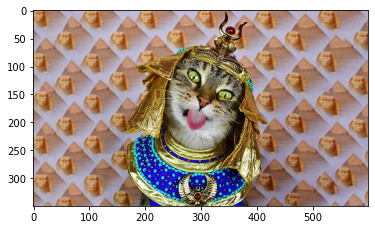

In [38]:
img = plt.imread("ADD A TEST IMAGE PATH")
plt.imshow(img)
print(prediction)

dog


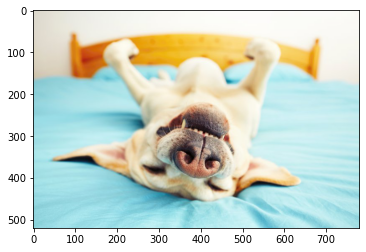

In [43]:
test_image = image.load_img("ADD A TEST IMAGE PATH", target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'


img = plt.imread("ADD A TEST IMAGE PATH")
plt.imshow(img)
print(prediction)